In [1]:
# Import BE solvers
from solvers import solver_v1 as s_v1
from solvers import solver_v2 as s_v2
from solvers import solver_v3 as s_v3

# Import tools for data analytics
import numpy as np
import scipy.linalg as lin
import scipy.integrate as sp
import matplotlib.pyplot as plt

#### Results from the Boltzmann equation solver version 1 - non-dimensionless version

In [2]:
ps = np.linspace(0.01,20,200)
ts = np.linspace(0.01,20,100)

grid = s_v1.BE_solver(ts,ps)

Initiating solving the Boltzmann Equation non-dimensionless


/home/tobias/Master-Thesis/solvers/solver_v1.py:53: RuntimeWarning: overflow encountered in scalar multiply
  integrand = qs[i] * qs[i] / (2 * E(qs[i])) * I(fp,fqs[i],p,qs[i],T) * F1(fp,fqs[i],p,qs[i],T)
/home/tobias/Master-Thesis/solvers/solver_v1.py:114: RuntimeWarning: invalid value encountered in scalar subtract
  df_dp = (grid[j+1][i] - f) / dp
/home/tobias/Master-Thesis/solvers/solver_v1.py:31: RuntimeWarning: invalid value encountered in scalar add
  return -fp + fq * np.exp(-E(p)-E(q))
/home/tobias/Master-Thesis/solvers/solver_v1.py:116: RuntimeWarning: invalid value encountered in scalar subtract
  df_dp = (f - grid[j-1][i]) / dp


BE solver non-dimensionless: complete


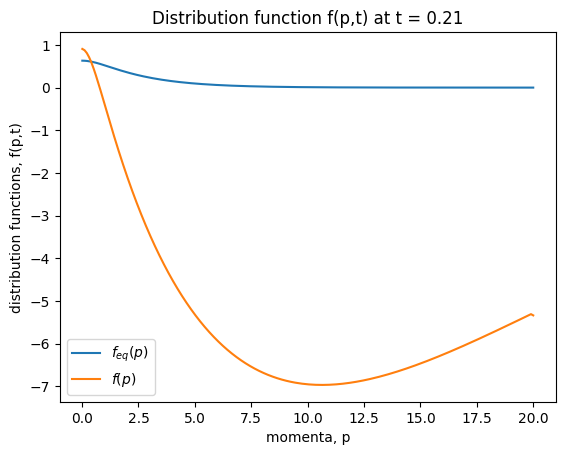

In [3]:
n = 1
fs = [grid[p][n] for p in range(len(ps))]

fs_eq = [s_v1.dist_eq(ps[i],ts[n]) for i in range(len(ps))]


plt.xlabel("momenta, p")
plt.ylabel("distribution functions, f(p,t)")
plt.title(f"Distribution function f(p,t) at t = {ts[n]:.2f}")
plt.plot(ps,fs_eq, label=r"$f_{eq}(p)$")
plt.plot(ps,[fs[i] for i in range(len(ps))], label=r"$f(p)$")
plt.legend()

#### Results from the dimensionless Boltzmann equation - using Euler's method

In [4]:
def initial_condition(y,x):
    return np.exp(-np.sqrt(x*x + y*y))

In [5]:
xmin = 0.01
xmax = 1
ys = np.linspace(0.01,15,100)


collisions_both    = lambda x, y, ys, f, f_ys: s_v2.C_ann(x,y,ys,f,f_ys) + s_v2.C_scatter(x,y,ys,f,f_ys)

distribution_none_1     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,lambda *args: 0,dx=1e-1)
distribution_none_2     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,lambda *args: 0,dx=1e-2)
distribution_none_3     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,lambda *args: 0,dx=1e-3)
print("Distribution function for no interactions complete")

distribution_scatter_1  = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_scatter,dx=1e-1)
distribution_scatter_2  = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_scatter,dx=1e-2)
distribution_scatter_3  = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_scatter,dx=1e-3)
print("Distribution function for scattering complete")

distribution_ann_1      = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_ann,dx=1e-1)
distribution_ann_2      = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_ann,dx=1e-2)
distribution_ann_3      = s_v2.BE_solver(xmin,xmax,ys,initial_condition,s_v2.C_ann,dx=1e-3)
print("Distribution function for annihilation complete")

distribution_both_1     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,collisions_both,dx=1e-1)
distribution_both_2     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,collisions_both,dx=1e-2)
distribution_both_3     = s_v2.BE_solver(xmin,xmax,ys,initial_condition,collisions_both,dx=1e-3)
print("Distribution function for annihilation + scattering complete")


Distribution function for no interactions complete


/home/tobias/Master-Thesis/solvers/solver_v2.py:65: RuntimeWarning: overflow encountered in scalar multiply
  integrand = lambda x, y1, y3, f_y1, f_y3: y3 * y3 / (4 * eps(x, y1) * eps(x, y3)) * H(x, y1, y3, f_y1, f_y3) * F2(x, y1, y3, f_y1, f_y3)
/home/tobias/.local/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:532: RuntimeWarning: invalid value encountered in scalar subtract
  result += alpha*y[slice1] + beta*y[slice2] - eta*y[slice3]


Distribution function for scattering complete


/home/tobias/Master-Thesis/solvers/solver_v2.py:30: RuntimeWarning: overflow encountered in scalar multiply
  return -f_y1 * f_y2 + np.exp(-eps(x,y1) - eps(x,y2))
/home/tobias/Master-Thesis/solvers/solver_v2.py:51: RuntimeWarning: overflow encountered in scalar multiply
  integrand = lambda x, y1, y2, f_y1, f_y2: y2 * y2 /(4 * eps(x,y1) * eps(x, y2)) * I(x, y1, y2, f_y1, f_y2) * F1(x, y1, y2, f_y1, f_y2)


Distribution function for annihilation complete
Distribution function for annihilation + scattering complete


In [ ]:
fs_none_1     = distribution_none_1[1]
fs_none_2     = distribution_none_2[1]
fs_none_3     = distribution_none_3[1]

fs_scatter_1  = distribution_scatter_1[1]
fs_scatter_2  = distribution_scatter_2[1]
fs_scatter_3  = distribution_scatter_3[1]

fs_ann_1      = distribution_ann_1[1]
fs_ann_2      = distribution_ann_2[1]
fs_ann_3      = distribution_ann_3[1]

fs_both_1     = distribution_both_1[1]
fs_both_2     = distribution_both_2[1]
fs_both_3     = distribution_both_3[1]

ys_none_1     = [fs_none_1[k][3] for k in range(len(ys))]
ys_none_2     = [fs_none_2[k][3] for k in range(len(ys))]
ys_none_3     = [fs_none_3[k][3] for k in range(len(ys))]

ys_scatter_1  = [fs_scatter_1[k][3] for k in range(len(ys))]
ys_scatter_2  = [fs_scatter_2[k][3] for k in range(len(ys))]
ys_scatter_3  = [fs_scatter_3[k][3] for k in range(len(ys))]

ys_ann_1      = [fs_ann_1[k][3] for k in range(len(ys))]
ys_ann_2      = [fs_ann_2[k][3] for k in range(len(ys))]
ys_ann_3      = [fs_ann_3[k][3] for k in range(len(ys))]

ys_both_1     = [fs_both_1[k][3] for k in range(len(ys))]
ys_both_2     = [fs_both_2[k][3] for k in range(len(ys))]
ys_both_3     = [fs_both_3[k][3] for k in range(len(ys))]

ys_initial = [initial_condition(y,xmin) for y in ys]

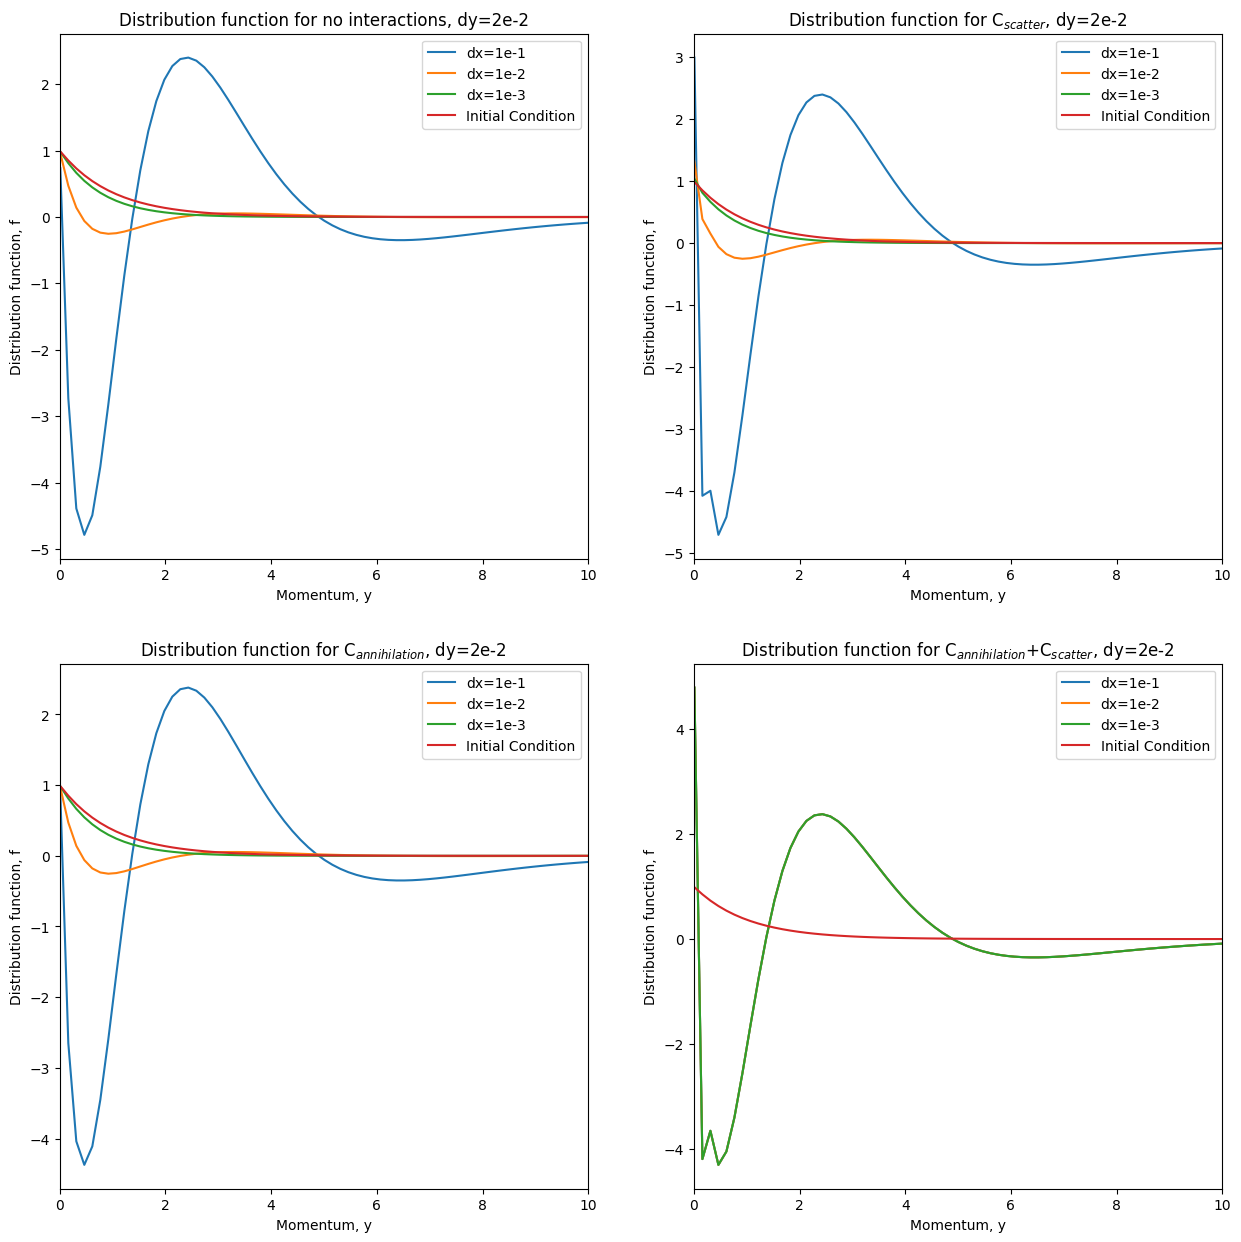

In [56]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize = (15,15))

ax[0,0].plot(ys,ys_none_1, label = "dx=1e-1")
ax[0,0].plot(ys,ys_none_2, label = "dx=1e-2")
ax[0,0].plot(ys,ys_none_3, label = "dx=1e-3")
ax[0,0].plot(ys,ys_initial, label ="Initial Condition")

ax[0,0].set_title(r"Distribution function for no interactions, dy=2e-2")
ax[0,0].set_xlabel("Momentum, y")
ax[0,0].set_ylabel("Distribution function, f")
ax[0,0].set_xlim([0,10])
ax[0,0].legend()

ax[0,1].plot(ys,ys_scatter_1, label = "dx=1e-1")
ax[0,1].plot(ys,ys_scatter_2, label = "dx=1e-2")
ax[0,1].plot(ys,ys_scatter_3, label = "dx=1e-3")
ax[0,1].plot(ys,ys_initial, label = "Initial Condition")

ax[0,1].set_title(r"Distribution function for C$_{scatter}$, dy=2e-2")
ax[0,1].set_xlabel("Momentum, y")
ax[0,1].set_ylabel("Distribution function, f")
ax[0,1].set_xlim([0,10])
ax[0,1].legend()


ax[1,0].plot(ys,ys_ann_1, label = "dx=1e-1")
ax[1,0].plot(ys,ys_ann_2, label = "dx=1e-2")
ax[1,0].plot(ys,ys_ann_3, label = "dx=1e-3")
ax[1,0].plot(ys,ys_initial, label = "Initial Condition")

ax[1,0].set_title(r"Distribution function for C$_{annihilation}$, dy=2e-2")
ax[1,0].set_xlabel("Momentum, y")
ax[1,0].set_ylabel("Distribution function, f")
ax[1,0].set_xlim([0,10])
ax[1,0].legend()


ax[1,1].plot(ys,ys_both_1, label = "dx=1e-1")
ax[1,1].plot(ys,ys_both_1, label = "dx=1e-2")
ax[1,1].plot(ys,ys_both_1, label = "dx=1e-3")
ax[1,1].plot(ys,ys_initial, label = "Initial Condition")

ax[1,1].set_title(r"Distribution function for C$_{annihilation}$+C$_{scatter}$, dy=2e-2")
ax[1,1].set_xlabel("Momentum, y")
ax[1,1].set_ylabel("Distribution function, f")
ax[1,1].set_xlim([0,10])
ax[1,1].legend()

#### BE with elastic scattering at different times

0.030000000000000016


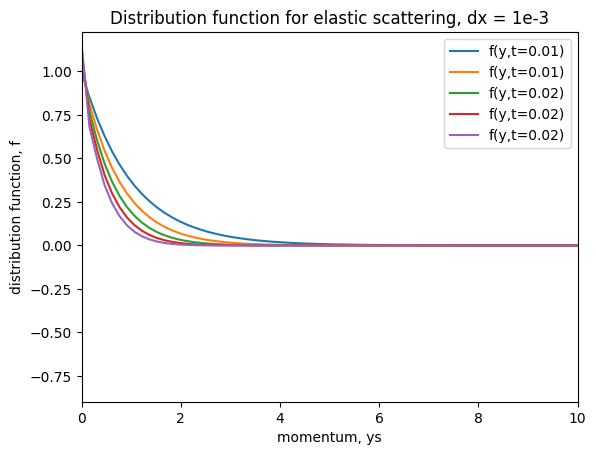

In [ ]:
xs  = distribution_scatter_3[0]   # list of x-points
for x in range(0,14,3):
    ys_scatter  = [fs_scatter_3[k][x] for k in range(len(ys))]
    plt.plot(ys,ys_scatter, label = f"f(y,t={xs[x]:.02f})")

plt.title("Distribution function for elastic scattering, dx = 1e-3")
plt.xlabel("momentum, ys")
plt.xlim(0,10)
plt.ylabel("distribution function, f")
plt.legend()

#### Computing the number density
Theory:
$$
n(t) = \int_{R^3} \frac{\textrm{d}^3p}{(2\pi)^3}f = 2\int_{p_{min}}^{p_{max}} \frac{p^2\textrm{d}p}{(2\pi)^2} f(p,t), \qquad \textrm{where} \qquad \textrm{d}^3p = 4\pi p^2 \textrm{d}p
$$

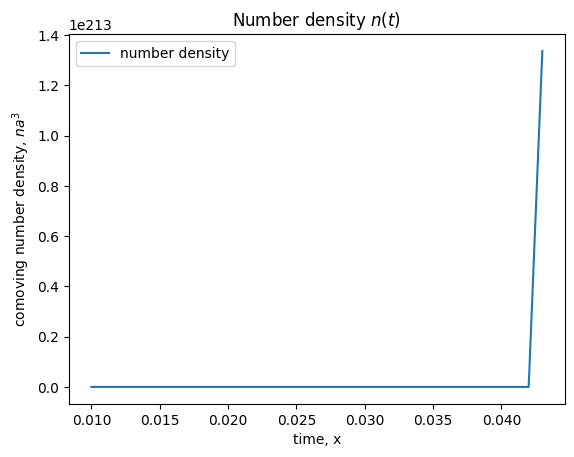

In [ ]:
# For each column we have different f(p,t=const) values. 


n = []
#print(ys)
# print([fs_scatter_3[j][1] for j in range(len(fs_scatter_3))])
for i in range(len(fs_scatter_3[0])):
    # compute all distribution function values at t = const
    fs = [ys[j] * ys[j] *fs_scatter_3[j][i] for j in range(len(fs_scatter_3))]

    n.append(s_v2.integrate(fs,ys))
#print(n)

plt.plot(xs,n, label = "number density")
plt.xlabel("time, x")
plt.ylabel(r"comoving number density, $na^3$")
plt.title(r"Number density $n(t)$")

plt.legend()

        
        

